In [25]:
#Import 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint


In [26]:
#Read CSV and make dataframe
path = 'Data/vgsales.csv'
video_games_df = pd.read_csv(path)
video_games_df = video_games_df.rename(columns = {"Publisher": "Company",
                                                 "NA_Sales": "North American Sales",
                                                 "EU_Sales": "European Sales",
                                                 "JP_Sales": "Japan Sales",
                                                 "Other_Sales": "Other Sales",
                                                 "Global_Sales": "Global Sales"})
video_games_df = video_games_df.set_index("Rank")
video_games_df.head()

,Name,Platform,Year,Genre,Company,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


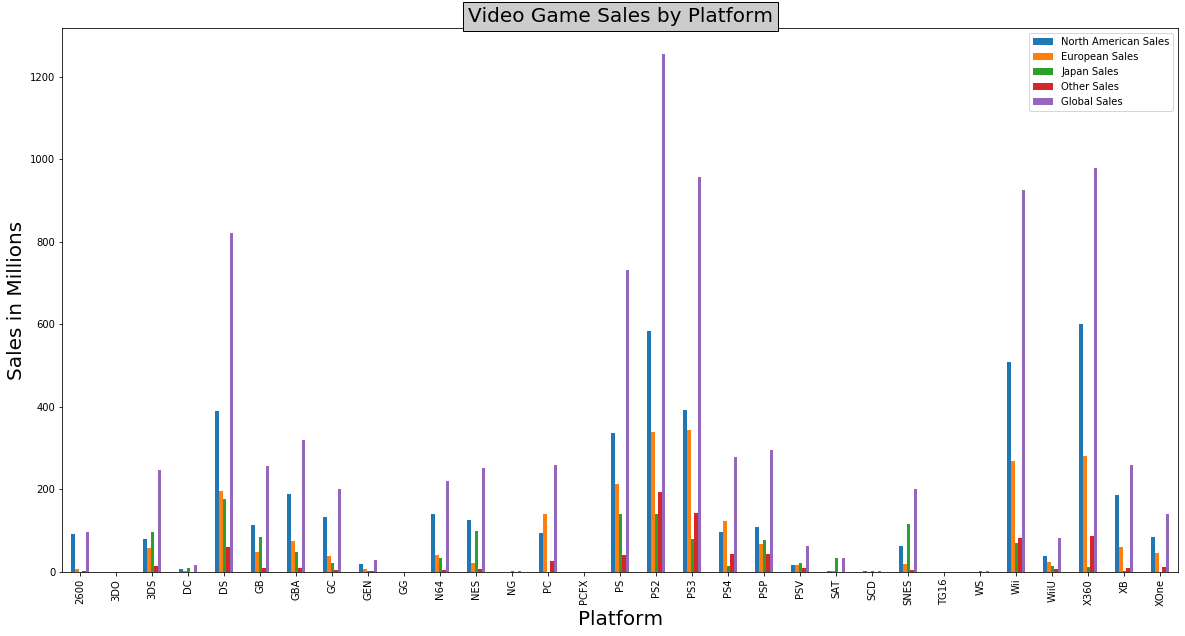

In [67]:
#find the number of sales per platform for each region
platform_df = video_games_df.groupby('Platform')

sales = platform_df[["North American Sales","European Sales","Japan Sales","Other Sales","Global Sales"]].sum()

#Removing insignificant values

significant_sales = sales.drop()

video_games_bar = sales.plot(kind="bar", figsize = (20,10), fontsize = 10)
video_games_bar.set_title("Video Game Sales by Platform", bbox ={'facecolor':'0.8', 'pad':5}, fontsize = 20)
video_games_bar.set_xlabel("Platform", fontsize = 20)
video_games_bar.set_ylabel("Sales in Millions", fontsize = 20)



plt.show()
#plt.tight_layout()


In [5]:
#nintendo = video_games_df.loc(['Platform'] = 'Nintendo')
#sorted_platforms_df = platform_df.iloc(["Global Sales"] > 10)
#sorted_platforms_df.head()
ds_data = video_games_df.loc[video_games_df['Platform'] == 'DS', :]
ds_data.head()

,Name,Platform,Year,Genre,Company,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


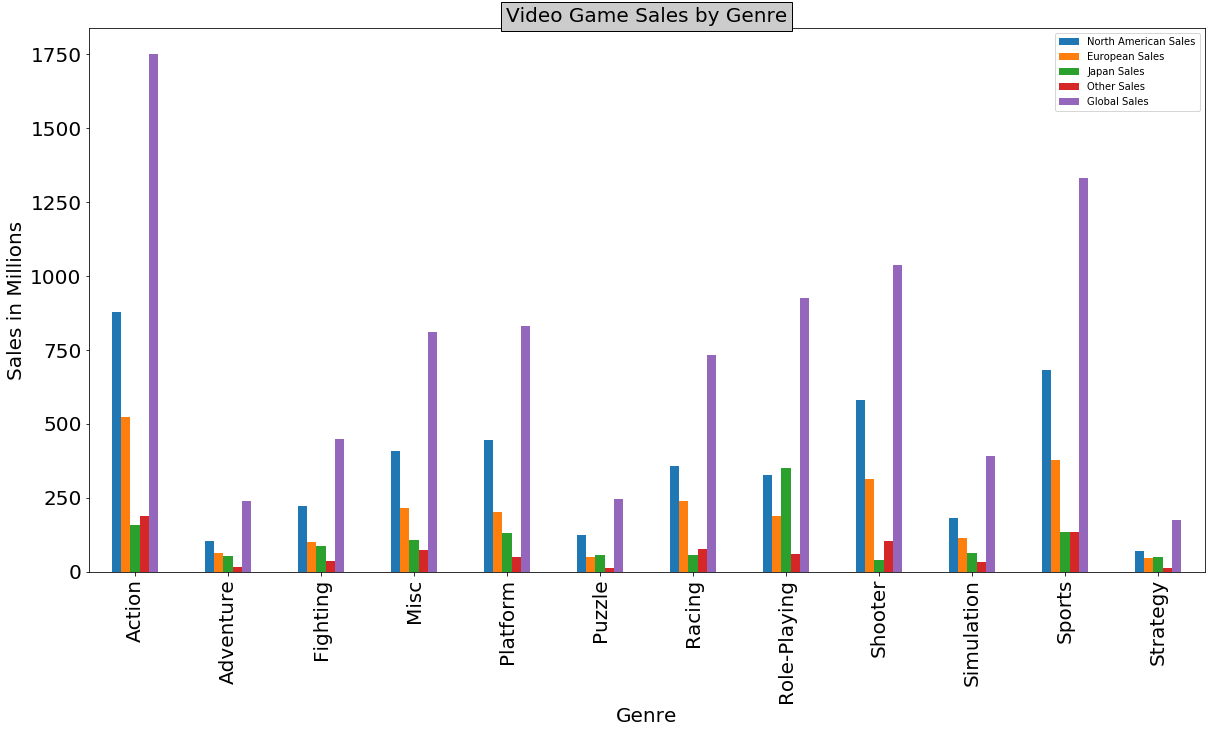

<Figure size 432x288 with 0 Axes>

In [65]:
genre_df = video_games_df.groupby('Genre')
sales_genre = genre_df["North American Sales","European Sales","Japan Sales","Other Sales","Global Sales"].sum()

video_games_genre_bar = sales_genre.plot(kind="bar", figsize = (20,10), fontsize = 20)
video_games_genre_bar.set_title("Video Game Sales by Genre", bbox ={'facecolor':'0.8', 'pad':5}, fontsize = 20)
video_games_genre_bar.set_xlabel("Genre", fontsize = 20)
video_games_genre_bar.set_ylabel("Sales in Millions", fontsize = 20)

plt.show()
plt.tight_layout()